In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('My Males Covid Data.csv')

In [3]:
df

,Unnamed: 0,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,TOBACCO,ICU,STATUS,DAY_DIED,MONTH_DIED
0,1,03/06/2020,97,1,72,2,2,2,2,1,2,97,Died,03,['06']
1,2,09/06/2020,1,2,55,1,2,2,2,2,2,2,Died,09,['06']
2,4,21/06/2020,97,2,68,1,2,2,2,2,2,97,Died,21,['06']
3,11,9999-99-99,2,2,24,2,2,2,2,2,2,2,Cured,9999-99-99,[]
4,12,9999-99-99,2,2,30,2,2,2,2,2,2,2,Cured,9999-99-99,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523506,1048570,9999-99-99,97,2,40,2,2,2,2,2,2,97,Cured,9999-99-99,[]
523507,1048571,9999-99-99,2,2,51,2,2,2,2,2,2,2,Cured,9999-99-99,[]
523508,1048572,9999-99-99,97,2,55,2,2,2,2,2,2,97,Cured,9999-99-99,[]
523509,1048573,9999-99-99,97,2,28,2,2,2,2,2,2,97,Cured,9999-99-99,[]


In [4]:
df.describe()

,Unnamed: 0,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,TOBACCO,ICU
count,5.235110e+05,523511.000000,523511.000000,523511.000000,523511.000000,523511.000000,523511.000000,523511.000000,523511.000000,523511.000000,523511.000000
mean,5.147915e+05,76.201852,3.202103,42.274428,2.234685,2.295971,2.495313,2.304336,2.176271,2.240557,76.240723
std,3.011946e+05,39.353243,11.443021,17.220961,5.863303,5.523906,7.038819,5.585147,5.571850,5.790824,39.301552
min,1.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.556800e+05,97.000000,2.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
50%,5.079470e+05,97.000000,2.000000,41.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,7.724015e+05,97.000000,2.000000,54.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
max,1.048574e+06,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000


HISTOGRAM

<AxesSubplot:>

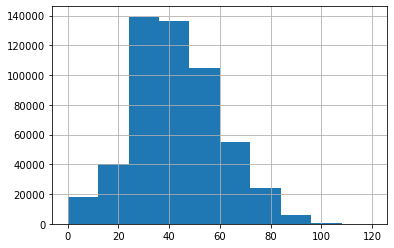

In [5]:
df.AGE.hist()

<AxesSubplot:>

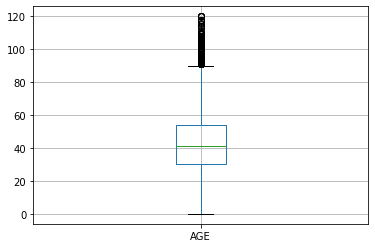

In [6]:
df.boxplot(column = 'AGE')

In [7]:
df['AG'] = df.AGE.apply(lambda x : x>100)

In [8]:
df['AG'].value_counts()

AG
False    523442
True         69
Name: count, dtype: int64

In [9]:
#Cleaning age 
df = df[df['AGE']<90]

BOXPLOT

<AxesSubplot:>

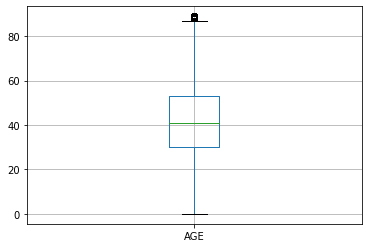

In [10]:
df.boxplot(column = 'AGE')

In [11]:
df.columns

Index(['Unnamed: 0', 'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES',
       'ASTHMA', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'TOBACCO',
       'ICU', 'STATUS', 'DAY_DIED', 'MONTH_DIED', 'AG'],
      dtype='object')

In [12]:
corr = df[['TOBACCO','INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES',
       'ASTHMA', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'ICU']].corr()
corr

,TOBACCO,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,ICU
TOBACCO,1.000000,-0.023866,-0.005275,0.021379,0.769080,0.841449,0.674273,0.854177,0.789886,-0.023894
INTUBED,-0.023866,1.000000,0.086070,-0.337728,-0.012906,-0.025501,-0.039614,-0.024992,-0.023701,0.999417
PNEUMONIA,-0.005275,0.086070,1.000000,-0.089904,-0.005688,-0.005933,-0.000125,-0.006070,-0.005314,0.086013
AGE,0.021379,-0.337728,-0.089904,1.000000,0.005838,0.022713,0.023381,0.019319,0.017227,-0.337679
DIABETES,0.769080,-0.012906,-0.005688,0.005838,1.000000,0.834876,0.647516,0.814839,0.751900,-0.012887
ASTHMA,0.841449,-0.025501,-0.005933,0.022713,0.834876,1.000000,0.709492,0.899909,0.825735,-0.025442
OTHER_DISEASE,0.674273,-0.039614,-0.000125,0.023381,0.647516,0.709492,1.000000,0.733284,0.656292,-0.039462
CARDIOVASCULAR,0.854177,-0.024992,-0.006070,0.019319,0.814839,0.899909,0.733284,1.000000,0.832546,-0.024934
OBESITY,0.789886,-0.023701,-0.005314,0.017227,0.751900,0.825735,0.656292,0.832546,1.000000,-0.023747
ICU,-0.023894,0.999417,0.086013,-0.337679,-0.012887,-0.025442,-0.039462,-0.024934,-0.023747,1.000000


HEAT MAP

<AxesSubplot:>

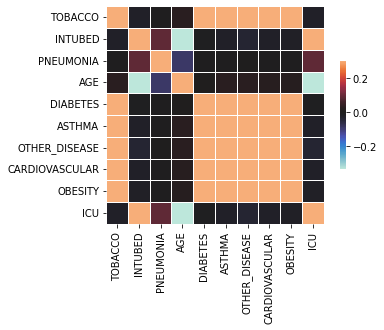

In [13]:
sns.heatmap(corr,vmax = 0.3 , center = 0,square = True, linewidths = 0.5,cbar_kws = {'shrink': 0.5})

PIVOT TABLE

In [14]:
pd.pivot_table(df, index = 'STATUS',values = 'AGE')

,AGE
STATUS,
Cured,40.260839
Died,59.981809


HOT TO DISPLAY ALL ROWS

In [15]:
pd.set_option('display.max_rows',None)

Graph for Life statuses of  Patients : total = 2


/tmp/ipykernel_7540/307659499.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)


<function matplotlib.pyplot.show(close=None, block=None)>

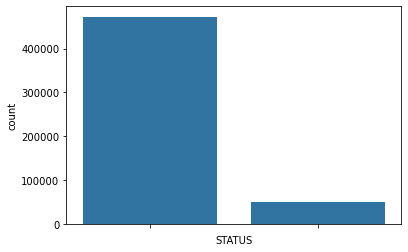

In [16]:
#Death rate vs curing rate
num = df['STATUS'].value_counts()
chart = sns.barplot(x=num.index, y= num)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
print("Graph for Life statuses of  %s : total = %d" % ('Patients',(len(num))))
plt.show

In [17]:
df2 = df[df['STATUS'] == 'Died'] #return people who died
df3 = df[df['STATUS'] == 'Cured']#return people who died

GRAPH FOR TOTAL NUMBER OF PEOPLE WHO DIED AGAINST  AGE : TOTAL = 90


/tmp/ipykernel_7540/1595413968.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(),rotation = 90, size = 5)


<function matplotlib.pyplot.show(close=None, block=None)>

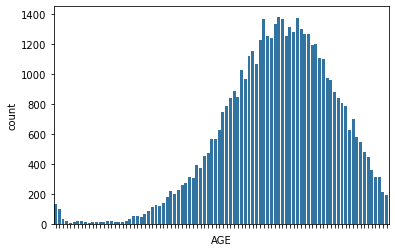

In [18]:
num2 = df2['AGE'].value_counts()
chart = sns.barplot(x=num2.index, y= num2)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 90, size = 5)
print("GRAPH FOR TOTAL NUMBER OF PEOPLE WHO DIED AGAINST  %s : TOTAL = %d" % ('AGE',(len(num2))))
plt.show

GRAPH FOR TOTAL NUMBER OF PEOPLE WHO CURED AGAINST  AGE : TOTAL = 90


/tmp/ipykernel_7540/4186009386.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(),rotation = 90, size =5)


<function matplotlib.pyplot.show(close=None, block=None)>

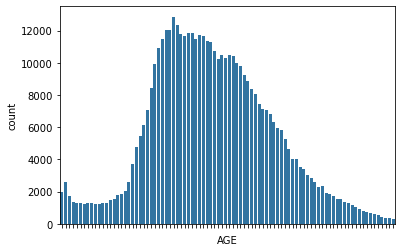

In [19]:
num3 = df3['AGE'].value_counts()
chart = sns.barplot(x=num3.index, y= num3)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 90, size =5)
print("GRAPH FOR TOTAL NUMBER OF PEOPLE WHO CURED AGAINST  %s : TOTAL = %d" % ('AGE',(len(num3))))
plt.show

#### 